In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report

In [113]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [114]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [115]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [116]:
print(df.shape)

(4340, 8)


In [117]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [119]:
df.duplicated().sum()

np.int64(763)

In [120]:
df = df.drop_duplicates(keep="first")

In [121]:
df.duplicated().sum()

np.int64(0)

In [122]:
print(df.shape)

(3577, 8)


In [123]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission	.value_counts())
print(df.owner.value_counts())

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64
seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64
transmission
Manual       3265
Automatic     312
Name: count, dtype: int64
owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64


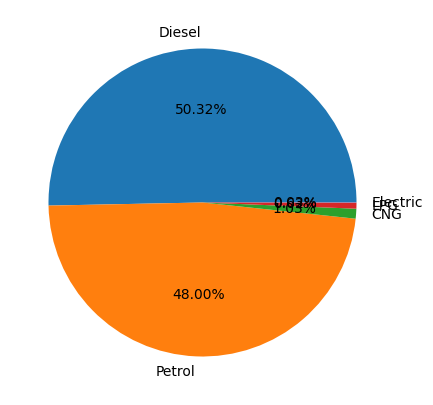

In [124]:
plt.figure(figsize=(10,5))
plt.pie(df.fuel.value_counts(),labels=df.fuel.value_counts().index,autopct='%1.2f%%')
plt.show()

In [125]:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

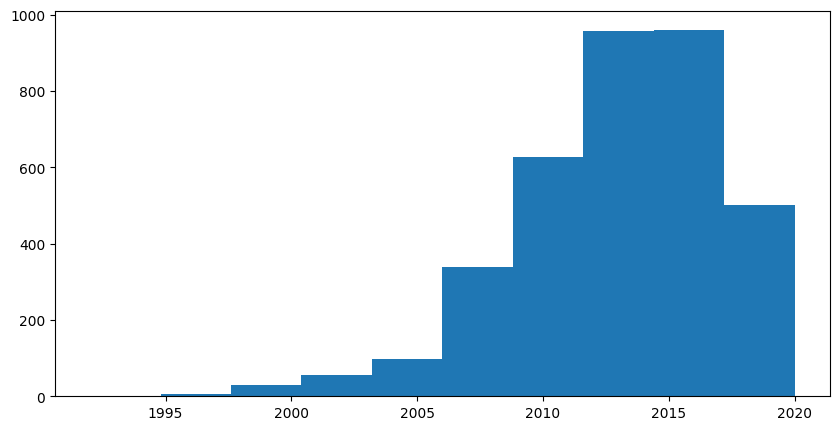

In [126]:
plt.figure(figsize=(10,5))
plt.hist(df.year)
plt.show()

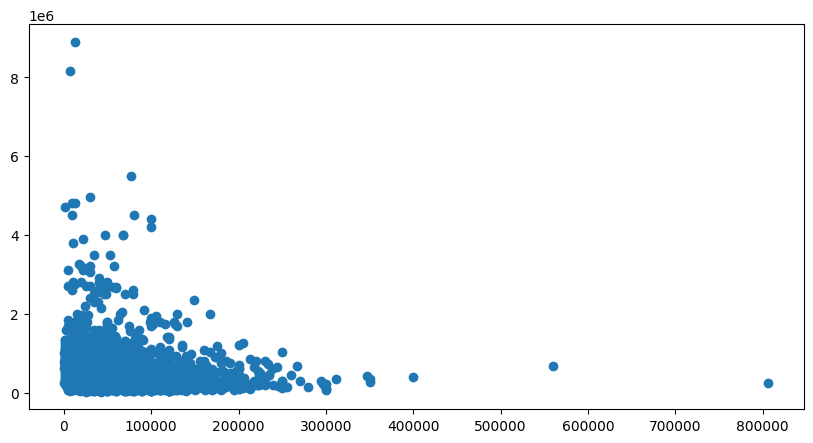

In [127]:
plt.figure(figsize=(10,5))
plt.scatter(df.km_driven,df.selling_price)
plt.show()

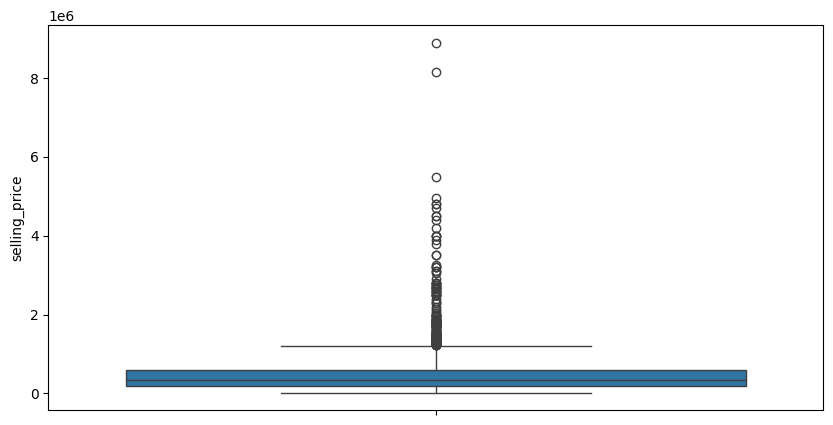

In [128]:
plt.figure(figsize=(10,5))
sns.boxplot(df.selling_price)
plt.show()

<Figure size 1000x500 with 0 Axes>

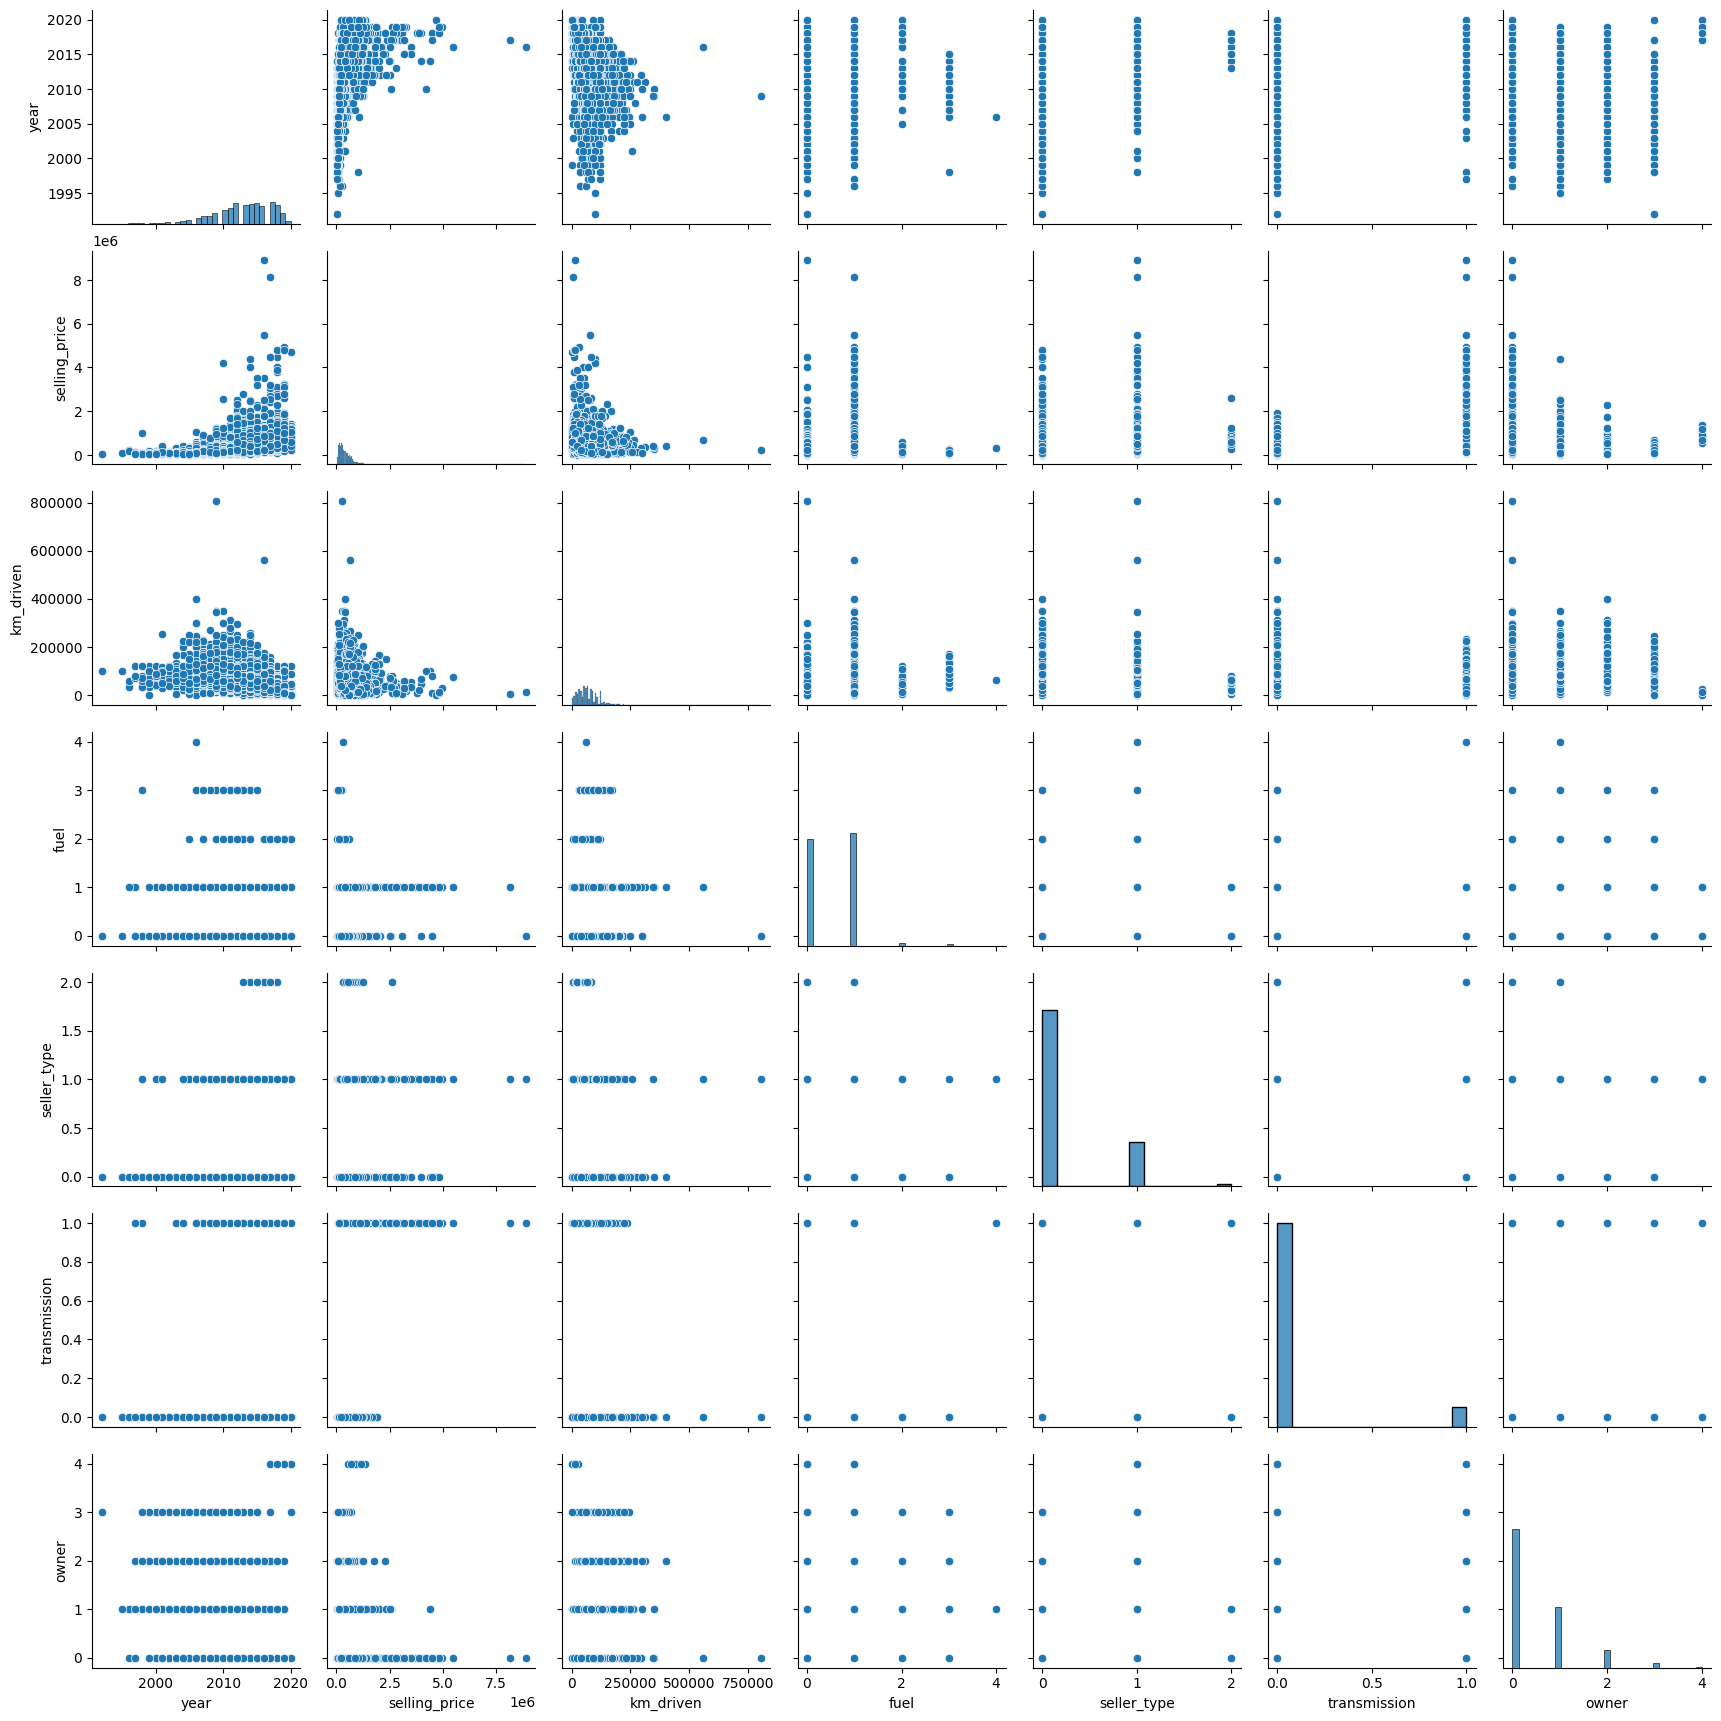

In [129]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

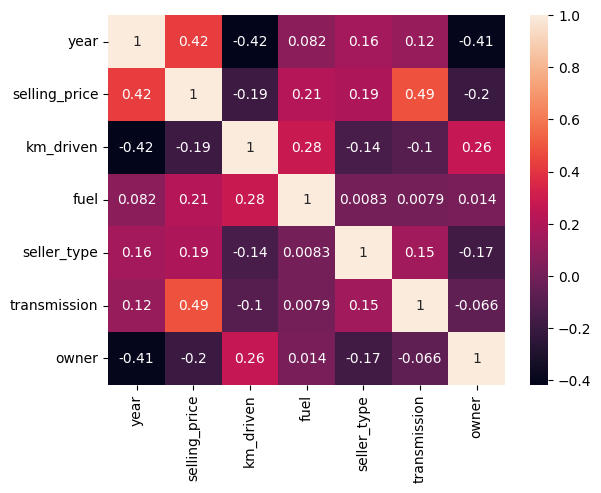

In [130]:
df_numeric = df.drop('name', axis=1)
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

In [131]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [132]:
X = df.drop(columns=['selling_price', 'name'], axis=1)
Y=df['selling_price']

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [134]:
lin_reg_model = LinearRegression()

In [135]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [136]:
training_data_prediction = lin_reg_model.predict(X_train)

In [137]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42506799475714985


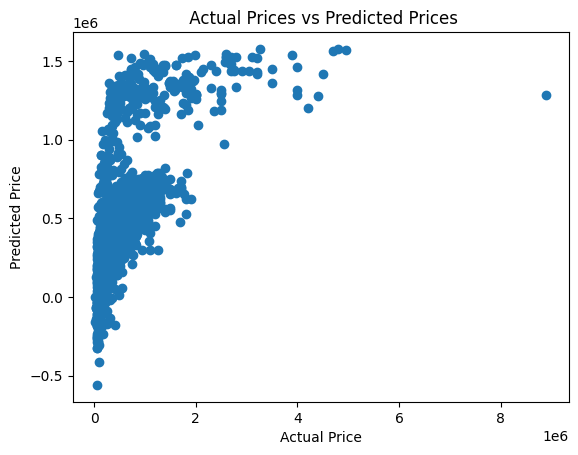

In [138]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [139]:
test_data_prediction = lin_reg_model.predict(X_test)

In [140]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.3746729494688624


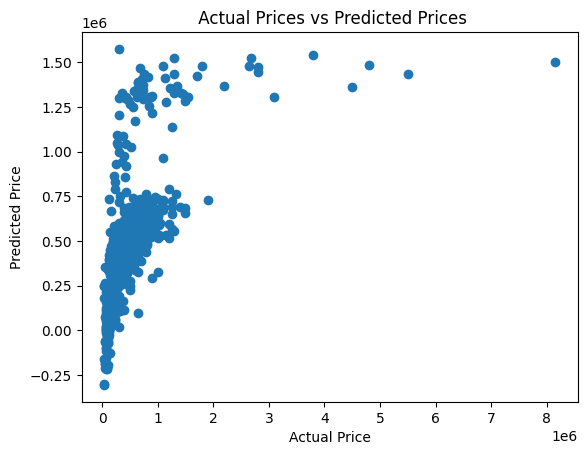

In [141]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [142]:
svm_model = SVR()
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

svm_mse = mean_squared_error(Y_test, svm_pred)
svm_r2 = r2_score(Y_test, svm_pred)

print("SVM Results:")
print("MSE:", svm_mse)
print("R² Score:", svm_r2)

SVM Results:
MSE: 339669208032.80536
R² Score: -0.05443662784268044


In [143]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(Y_test, knn_pred)
knn_r2 = r2_score(Y_test, knn_pred)

print("KNN Results:")
print("MSE:", knn_mse)
print("R² Score:", knn_r2)

KNN Results:
MSE: 284877146205.9631
R² Score: 0.11565461251391773


In [144]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, rf_pred)
rf_r2 = r2_score(Y_test, rf_pred)

print("Random Forest Results:")
print("MSE:", rf_mse)
print("R² Score:", rf_r2)

Random Forest Results:
MSE: 178777215259.2616
R² Score: 0.4450210983655766


In [145]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [146]:
import gradio as gr
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])


model = RandomForestRegressor()
model.fit(X, Y)

def predict(year, km, fuel, seller, trans, owner):
    fuel_encoded = le.transform([fuel])[0]
    seller_encoded = le.transform([seller])[0]
    trans_encoded = le.transform([trans])[0]
    owner_encoded = le.transform([owner])[0]

    input_data = [[year, km, fuel_encoded, seller_encoded, trans_encoded, owner_encoded]]
    prediction = model.predict(input_data)[0]
    return f"Estimated Price: ₹{int(prediction):,}"

fuel_options = df['fuel'].unique().tolist()
seller_options = df['seller_type'].unique().tolist()
trans_options = df['transmission'].unique().tolist()
owner_options = df['owner'].unique().tolist()

gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Kilometers Driven"),
        gr.Dropdown(choices=df['fuel'].unique().tolist(), label="Fuel"),
        gr.Dropdown(choices=df['seller_type'].unique().tolist(), label="Seller Type"),
        gr.Dropdown(choices=df['transmission'].unique().tolist(), label="Transmission"),
        gr.Dropdown(choices=df['owner'].unique().tolist(), label="Owner Type")
    ],
    outputs="text",
    title="Simple Car Price Predictor"
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4f3332e7f621cfe8c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
